In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Sahil\OneDrive\Documents\test.csv")

In [3]:
df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [4]:
df['Class Index']= df['Class Index'].replace(1, 'World')

In [5]:
df['Class Index']= df['Class Index'].replace(2, 'Sports')
df['Class Index']= df['Class Index'].replace(3, 'Business')
df['Class Index']= df['Class Index'].replace(4, 'Sci/Tech')

In [6]:
df['Class Index']

0       Business
1       Sci/Tech
2       Sci/Tech
3       Sci/Tech
4       Sci/Tech
          ...   
7595       World
7596      Sports
7597      Sports
7598    Business
7599    Business
Name: Class Index, Length: 7600, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   object
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: object(3)
memory usage: 178.3+ KB


In [8]:
df.shape

(7600, 3)

In [9]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [10]:
df['Class Index'].value_counts()

Class Index
Business    1900
Sci/Tech    1900
Sports      1900
World       1900
Name: count, dtype: int64

In [11]:
import nltk

In [12]:
df['num_chr']=df["Description"].apply(len)

In [13]:
df['num_words']=df['Description'].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
df.head()

,Class Index,Title,Description,num_chr,num_words
0,Business,Fears for T N pension after talks,Unions representing workers at Turner Newall...,127,20
1,Sci/Tech,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",234,41
2,Sci/Tech,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,214,40
3,Sci/Tech,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,272,56
4,Sci/Tech,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,179,31


<Axes: xlabel='num_chr', ylabel='Count'>

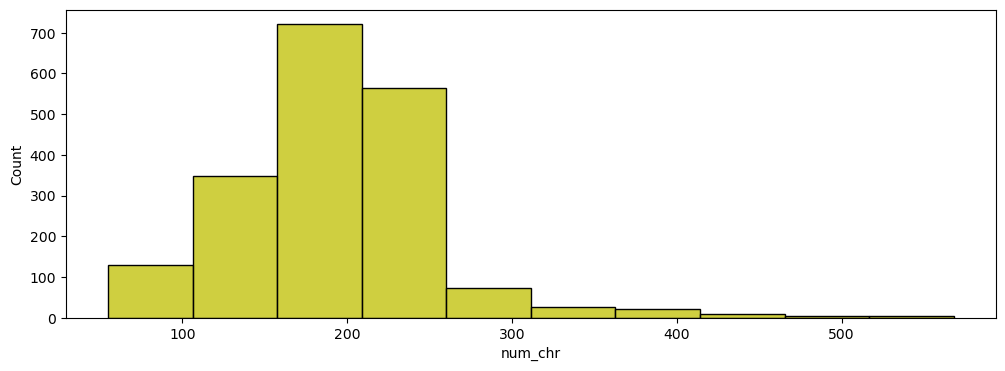

In [15]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['Class Index']=='World']['num_chr'],color='y',bins=10)

<Axes: xlabel='num_chr', ylabel='Count'>

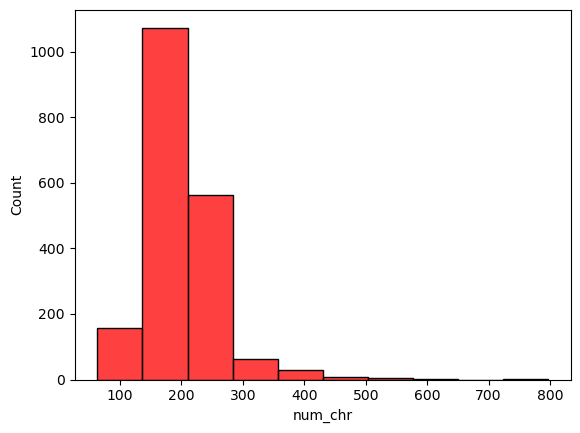

In [17]:
sns.histplot(df[df['Class Index']=='Business']['num_chr'] ,color= 'r',bins=10)

<Axes: xlabel='num_chr', ylabel='Count'>

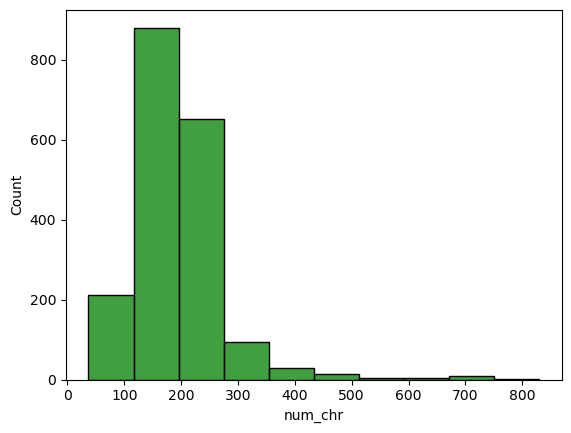

In [18]:
sns.histplot(df[df['Class Index']=='Sci/Tech']['num_chr'],color='g',bins=10)

<Axes: xlabel='num_chr', ylabel='Count'>

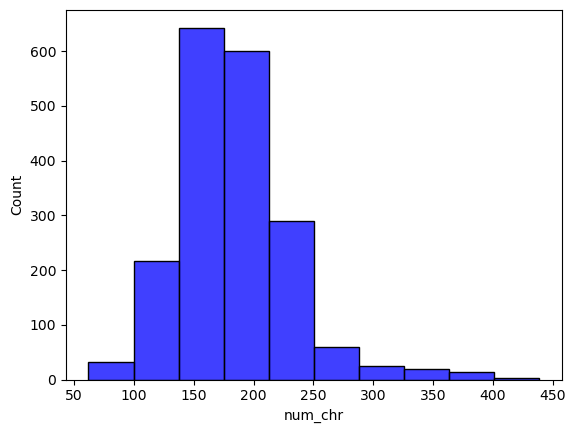

In [19]:
sns.histplot(df[df['Class Index']=='Sports']['num_chr'] , color= 'b',bins=10)

In [20]:
df1=df.drop(columns=['Title','Description'])

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=  LabelEncoder()
df1['Class Index']=encoder .fit_transform(df["Class Index"])

In [22]:
df1.head()

,Class Index,num_chr,num_words
0,0,127,20
1,1,234,41
2,1,214,40
3,1,272,56
4,1,179,31


<Axes: >

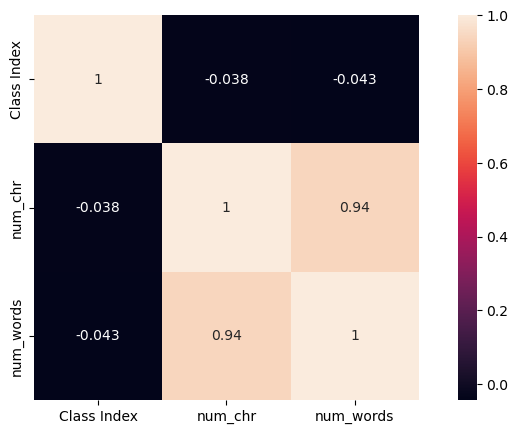

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr() , annot=True , square=True)

In [24]:
df.shape

(7600, 5)

In [25]:
df.drop(columns=['Title'])

,Class Index,Description,num_chr,num_words
0,Business,Unions representing workers at Turner Newall...,127,20
1,Sci/Tech,"SPACE.com - TORONTO, Canada -- A second\team o...",234,41
2,Sci/Tech,AP - A company founded by a chemistry research...,214,40
3,Sci/Tech,AP - It's barely dawn when Mike Fitzpatrick st...,272,56
4,Sci/Tech,AP - Southern California's smog-fighting agenc...,179,31
...,...,...,...,...
7595,World,Ukrainian presidential candidate Viktor Yushch...,183,30
7596,Sports,With the supply of attractive pitching options...,345,66
7597,Sports,Like Roger Clemens did almost exactly eight ye...,156,28
7598,Business,SINGAPORE : Doctors in the United States have ...,166,27


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Description'],df['Class Index'],test_size=0.3,random_state=5)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [28]:
classifier = Pipeline([('tfidf' , TfidfVectorizer()), ('classifer' , RandomForestClassifier(n_estimators=100))])

In [29]:
classifier.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifer', RandomForestClassifier())])

In [30]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [31]:
def acc(y_pred , y_test):
  print(accuracy_score(y_pred , y_test))
  print(classification_report(y_pred , y_test))
  print(confusion_matrix(y_pred , y_test))

In [32]:
y_pre = classifier.predict(x_test)

In [33]:
acc(y_pre , y_test)

0.8171052631578948
              precision    recall  f1-score   support

    Business       0.75      0.80      0.77       535
    Sci/Tech       0.79      0.78      0.78       569
      Sports       0.94      0.84      0.89       646
       World       0.79      0.84      0.82       530

    accuracy                           0.82      2280
   macro avg       0.82      0.82      0.82      2280
weighted avg       0.82      0.82      0.82      2280

[[428  64  10  33]
 [ 80 445  13  31]
 [ 24  24 545  53]
 [ 40  32  13 445]]


In [37]:
classifier.predict(['The team scored two goals in the final five minutes to win the match.'])

array(['Sports'], dtype=object)